# Stock programming

製作者：賴志宏 建立日期：2020.07.18 最後修改日期：2020.08.07

## 重要課程內容

* 股票理論
    * K線圖理論
    * 移動平均線(MA)
        * 葛蘭碧八大法則
        * 多頭與空頭排列
        * 黃金交叉與死亡交叉
        * MA常用線形
    * 相對強弱指標(RSI)
    * 隨機指標 (KD)
    * 平滑異同移動平均線(MACD)

* 圖形繪製部分：
    * 繪製江波圖
    * 繪製量價折線圖
    * 繪製折線圖
    * 繪製K線圖
    * 移動平均線 & 價格折線圖
* 操作績效
    * 各種績效的比較

* 學生作業：自訂策略進行買賣以求出損益
* 學生分組進行作業
    * 分組成員盡量能跨領域，每組都包含資工與財務相關領域的學生
    * 期末報告：

## 教學會用到的內容（必須要教的）

* data type: list, tuple, dictionary
* list和for 迴圈的簡化版：例如 a = [line for line in Aarray if line > 0]
* function
* 檔案格式，CSV檔案處理
* package & module
* time 的moudle 
* mplfinance 繪圖 (matplotlib不教，直接提供他們影片檔，需要時可以自行學習） 
* numpy & pandas （可以的話直接教pandas）
    * pandas.read_csv()
* Talib
* 績效試算


## TEJ的檔案匯出

* 左邊功能表 / 未調整股價（日）按兩下/ 選擇股票和查詢日期
* 日期排序：按照時間先後次序排列，最早的時間在上面
* 上面功能表的「匯出」 => 自動開啟EXCEL，並將檔案打開
* 數字的部分要先拿掉每三位一撇的逗號，再存檔 （設定儲存格格式/取消「使用千分位符號」）
* 另存新檔，副檔名要選擇「CSV)」，即用,隔開欄位



### CSV檔案內容

* 可用「記事本」軟體打開上述的CSV檔案，其內容如下：
* 每一筆資料都是EXCEL中一列的資料，每個欄位用逗號隔開

In [ ]:
2330 台積電 -- 20110101-99999999,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,
年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,流通在外股數(千股),市值(百萬元),最後揭示買價,最後揭示賣價,報酬率-Ln,市值比重％,成交值比重％,成交筆數(筆),本益比-TSE,本益比-TEJ,股價淨值比-TSE,股價淨值比-TEJ
2011/1/3,71.5,71.6,70.8,71.1,35747 ,2541551 ,0.1408,0.138,25910078 ,1842206 ,71,71.1,0.1407,7.721,1.76,7394,11.99,12.01,3.43,3.43
2011/1/4,71,71.6,70.8,71.2,36048 ,2567399 ,0.1406,0.1391,25910078 ,1844797 ,71.1,71.2,0.1405,7.756,1.636,8813,12.01,12.03,3.44,3.44
2011/1/5,70.9,71.1,69.6,69.8,54327 ,3811818 ,-1.9663,0.2097,25910078 ,1808523 ,69.8,69.9,-1.9859,7.733,2.184,12673,11.77,11.79,3.37,3.37
2011/1/6,69.8,71,69.7,71,46802 ,3295606 ,1.7192,0.1806,25910078 ,1839615 ,70.9,71,1.7046,7.834,2.443,8619,11.97,12,3.43,3.43
2011/1/7,71.9,73,71.9,72.5,170328 ,12335418 ,2.1127,0.6574,25910078 ,1878480 ,72.4,72.5,2.0907,8.343,8.044,23691,12.23,12.25,3.5,3.5
2011/1/10,73,74.2,72.6,74.2,69703 ,5110967 ,2.3448,0.269,25910078 ,1922527 ,74,74.2,2.3178,8.503,5.307,16369,12.51,12.54,3.58,3.58
2011/1/11,74.1,74.9,73.8,74.5,82758 ,6162045 ,0.4043,0.3194,25910078 ,1930300 ,74.4,74.5,0.4035,8.429,4.9
...
...

## 自訂函式庫（之後會用到，教學時先跳過，之後會介紹）

In [4]:
# 自訂函式庫
# 註：資工系學生或是老手可以自行將股票資料改為 Dataframe

def GetStock(file_name):
    from datetime import datetime

    SData = open(file_name).readlines()
    MData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

    SData2 = [[datetime.strptime(line[0], '%Y/%m/%d').date(), float(line[1]), float(line[2]), \
           float(line[3]), float(line[4]), int(line[5]), int(line[6])] for line in MData[3: ] ]
    return SData2

'''
    [0]: 'date'
    [1]: 'open'
    [2]: 'high'
    [3]: 'low'
    [4]: 'close'
    [5]: 'volume'
    [6]: 'amount'
'''

# 以下函式主要為talib套件使用

def GetStock_dic(file_name):
    import numpy as np

    SData = GetStock(file_name)
    stock = {}
    stock['date'] = np.array([line[0] for line in SData])
    stock['open'] = np.array([line[1] for line in SData])
    stock['high'] = np.array([line[2] for line in SData])
    stock['low'] = np.array([line[3] for line in SData])
    stock['close'] = np.array([line[4] for line in SData])
    stock['volume'] = np.array([line[5] for line in SData])
    
    return stock


def GetStock_dic2000(file_name):
    import numpy as np

    SData = open(file_name).readlines()
    SData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

    SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

    stock = {}
    stock['date'] = np.array([line[0] for line in SData])
    stock['open'] = np.array([line[1] for line in SData])
    stock['high'] = np.array([line[2] for line in SData])
    stock['low'] = np.array([line[3] for line in SData])
    stock['close'] = np.array([line[4] for line in SData])
    stock['volume'] = np.array([line[5] for line in SData])
    
    return stock

In [231]:
# function test 

a = GetStock('data/TEJ2330.csv')
print(type(a[0][0]))

from talib import abstract
b = GetStock_array('data/TEJ2330.csv')

c = abstract.SMA(b, timeperiod = 5)
print(c)

print(b['close'][:10])
print(b['open'][:10])
print(b['date'][:10])


<class 'datetime.date'>
[  nan   nan   nan ... 354.9 357.4 361.1]
[71.1 71.2 69.8 71.  72.5 74.2 74.5 74.9 74.6 74.8]
[71.5 71.  70.9 69.8 71.9 73.  74.1 74.7 75.1 74.4]
[datetime.date(2011, 1, 3) datetime.date(2011, 1, 4)
 datetime.date(2011, 1, 5) datetime.date(2011, 1, 6)
 datetime.date(2011, 1, 7) datetime.date(2011, 1, 10)
 datetime.date(2011, 1, 11) datetime.date(2011, 1, 12)
 datetime.date(2011, 1, 13) datetime.date(2011, 1, 14)]


### 檔案處理的教學過程

* 參考 stock_programming 檔案

## 理論部分

### 相對強弱指標(RSI)
* 定義
    * RSI(Relative Strength Index)為技術大師威爾德所創，它代表多空力道之間的抗衡所使用的一種指標，故又稱為相對強弱指標。 
    * RSI = N日平均漲幅 / (N日平均漲幅 + N日平均跌幅) * 100
    * RSI之範圍: 1 ~ 100，N表示週期的天數
    * <img src = "images/negative_relation.jpg" width = "300" height = "100">
* RSI的使用（部分原則）
    * 50為多空平衡點，50以上是多頭市場，代表多頭力道大於空頭力道，宜買；50以下是空頭市場，代表空頭力道大於多頭力道，宜賣。
    * 80以上為超買區，90以上是嚴重超買區，若出現M頭宜賣。20以下為超賣區，10以下是嚴重超賣區，若出現W底宜買。
    * RSI若一底比一底高(以6日RSI為主)，代表多頭力道轉強，後市可能再漲一段，宜買；若RSI一底比一底低(以6日RSI為主)，代表空頭力道轉弱，後市可能再跌一段，宜賣。


### 隨機指標 (KD)

* 0 ≤ KD ≤ 100


### 平滑異同移動平均線(MACD)

* 

## 技術部分上課內容

In [183]:
# version 1
# 整理資料到串列，完整版：

from datetime import datetime

SData = open('data/TEJ2330.csv').readlines()
MData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

SData2 = []
temp_list = [0] * 7   
# temp_list = [0 for i in range(7)]

for line in MData[3: ]:     # 前面三行的資料為檔案的表頭和股票資料，予以刪除
    temp_list[0] = datetime.strptime(line[0], '%Y/%m/%d').date()  # 日期欄位
    temp_list[1] = float(line[1])   # 開盤價(元)
    temp_list[2] = float(line[2])   # 最高價(元)
    temp_list[3] = float(line[3])   # 最低價(元)
    temp_list[4] = float(line[4])   # 收盤價(元),
    temp_list[5] = int(line[5])     # 成交量(千股
    temp_list[6] = int(line[6])     # 成交值(千元)
    SData2.append(temp_list)
print(SData2[:10])

[[datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495], [datetime.date(2020, 7, 17), 361.0, 369.0, 360.0, 367.0, 66403, 24244495]]


In [186]:
# version 2
# 整理資料到串列，簡化版：

from datetime import datetime

SData = open('data/TEJ2330.csv').readlines()
MData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

SData2 = [[datetime.strptime(line[0], '%Y/%m/%d').date(), float(line[1]), float(line[2]), \
           float(line[3]), float(line[4]), int(line[5]), int(line[6])] for line in MData[3: ] ]

print(SData2[:10])

[[datetime.date(2011, 1, 3), 71.5, 71.6, 70.8, 71.1, 35747, 2541551], [datetime.date(2011, 1, 4), 71.0, 71.6, 70.8, 71.2, 36048, 2567399], [datetime.date(2011, 1, 5), 70.9, 71.1, 69.6, 69.8, 54327, 3811818], [datetime.date(2011, 1, 6), 69.8, 71.0, 69.7, 71.0, 46802, 3295606], [datetime.date(2011, 1, 7), 71.9, 73.0, 71.9, 72.5, 170328, 12335418], [datetime.date(2011, 1, 10), 73.0, 74.2, 72.6, 74.2, 69703, 5110967], [datetime.date(2011, 1, 11), 74.1, 74.9, 73.8, 74.5, 82758, 6162045], [datetime.date(2011, 1, 12), 74.7, 75.0, 74.7, 74.9, 53637, 4014372], [datetime.date(2011, 1, 13), 75.1, 75.3, 74.2, 74.6, 93105, 6938412], [datetime.date(2011, 1, 14), 74.4, 74.8, 74.1, 74.8, 29817, 2220104]]


In [55]:
# old
# 整理資料到串列，完整版：

from datetime import datetime
SData = open('data/TEJ2330.csv').readlines()
SData2 = []
for line in SData:
    line = line.strip('\n').split(',')
    if (line[0][:2] == '20') :
        line[0] = datetime.strptime(line[0], '%Y/%m/%d').date()  # 日期欄位
        line[1] = float(line[1])   # 開盤價(元)
        line[2] = float(line[2])   # 最高價(元)
        line[3] = float(line[3])   # 最低價(元)
        line[4] = float(line[4])   # 收盤價(元),
        line[5] = int(line[5])     # 成交量(千股
        line[6] = int(line[6])     # 成交值(千元)
        SData2.append(line[:7])
print(SData2[:10])

[[datetime.date(2011, 1, 3), 71.5, 71.6, 70.8, 71.1, 35747, 2541551], [datetime.date(2011, 1, 4), 71.0, 71.6, 70.8, 71.2, 36048, 2567399], [datetime.date(2011, 1, 5), 70.9, 71.1, 69.6, 69.8, 54327, 3811818], [datetime.date(2011, 1, 6), 69.8, 71.0, 69.7, 71.0, 46802, 3295606], [datetime.date(2011, 1, 7), 71.9, 73.0, 71.9, 72.5, 170328, 12335418], [datetime.date(2011, 1, 10), 73.0, 74.2, 72.6, 74.2, 69703, 5110967], [datetime.date(2011, 1, 11), 74.1, 74.9, 73.8, 74.5, 82758, 6162045], [datetime.date(2011, 1, 12), 74.7, 75.0, 74.7, 74.9, 53637, 4014372], [datetime.date(2011, 1, 13), 75.1, 75.3, 74.2, 74.6, 93105, 6938412], [datetime.date(2011, 1, 14), 74.4, 74.8, 74.1, 74.8, 29817, 2220104]]


In [207]:
# 設定為函式

def GetStock(file_name):
    from datetime import datetime

    SData = open(file_name).readlines()
    MData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

    SData2 = [[datetime.strptime(line[0], '%Y/%m/%d').date(), float(line[1]), float(line[2]), \
           float(line[3]), float(line[4]), int(line[5]), int(line[6])] for line in MData[3: ] ]
    return SData2

In [188]:
# 函式呼叫練習

stock2330 = GetStock('data/TEJ2330.csv')
print(stock2330[:10])

[[datetime.date(2011, 1, 3), 71.5, 71.6, 70.8, 71.1, 35747, 2541551], [datetime.date(2011, 1, 4), 71.0, 71.6, 70.8, 71.2, 36048, 2567399], [datetime.date(2011, 1, 5), 70.9, 71.1, 69.6, 69.8, 54327, 3811818], [datetime.date(2011, 1, 6), 69.8, 71.0, 69.7, 71.0, 46802, 3295606], [datetime.date(2011, 1, 7), 71.9, 73.0, 71.9, 72.5, 170328, 12335418], [datetime.date(2011, 1, 10), 73.0, 74.2, 72.6, 74.2, 69703, 5110967], [datetime.date(2011, 1, 11), 74.1, 74.9, 73.8, 74.5, 82758, 6162045], [datetime.date(2011, 1, 12), 74.7, 75.0, 74.7, 74.9, 53637, 4014372], [datetime.date(2011, 1, 13), 75.1, 75.3, 74.2, 74.6, 93105, 6938412], [datetime.date(2011, 1, 14), 74.4, 74.8, 74.1, 74.8, 29817, 2220104]]


## 繪製圖形



### 繪圖使用之套件：
* matplotlib
    * 參考文件：https://matplotlib.org/index.html
    * 函式使用說明：https://matplotlib.org/api/index.html#modules

### 股價折線圖

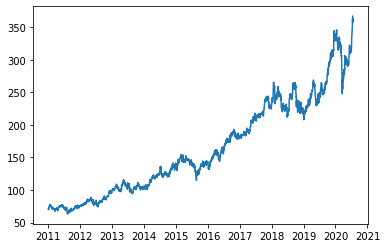

In [201]:
# 繪製價格折線圖 v.1 不呼叫函式

from datetime import datetime

SData = open('data/TEJ2330.csv').readlines()
MData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

xs = [datetime.strptime(line[0], '%Y/%m/%d').date() for line in MData[3:]]
Price = [float(line[4]) for line in MData[3:]]

plt.plot(xs, Price)

#顯示繪製圖表
plt.show()

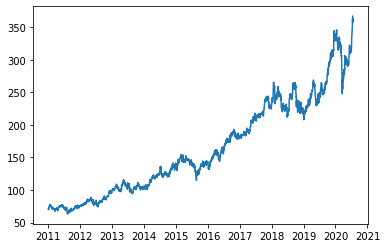

In [196]:
# 繪製價格折線圖 v.2 呼叫函式

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = GetStock('data/TEJ2330.csv')

xs = [line[0] for line in SData]
Price = [line[4] for line in SData]

plt.plot(xs, Price)

#顯示繪製圖表
plt.show()

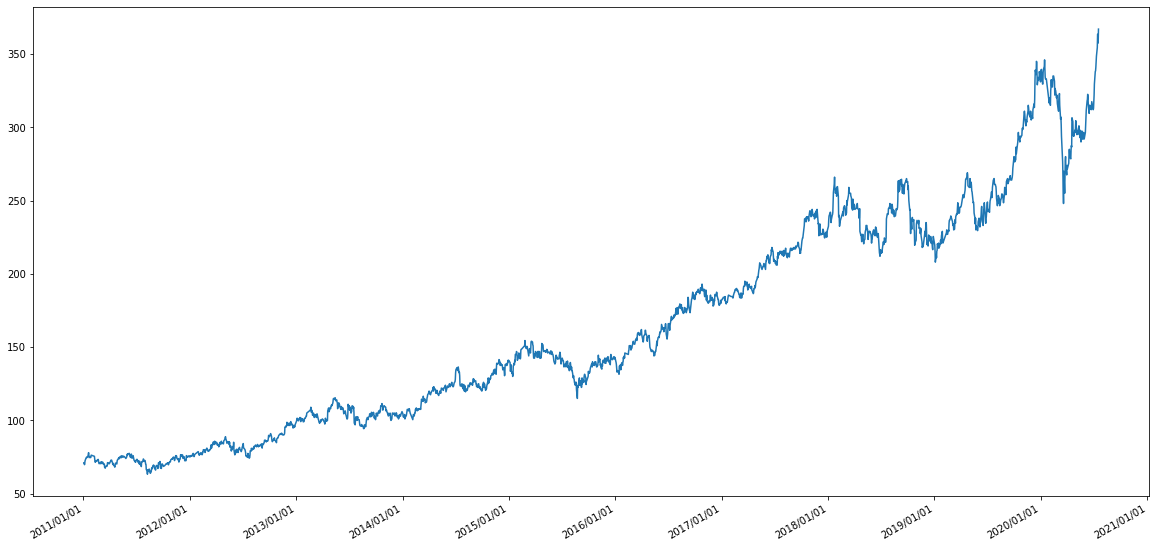

In [194]:
# 繪製價格折線圖 v.2 呼叫函式擴充版

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = GetStock('data/TEJ2330.csv')

xs = [line[0] for line in SData]
Price = [line[4] for line in SData]

# 配置横坐標
plt.figure(figsize = (20,10)) # 設定圖形大小
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # x座標每年顯示一次

plt.plot(xs, Price)
plt.gcf().autofmt_xdate()  #自動旋轉日期標記


#顯示繪製圖表
plt.show()

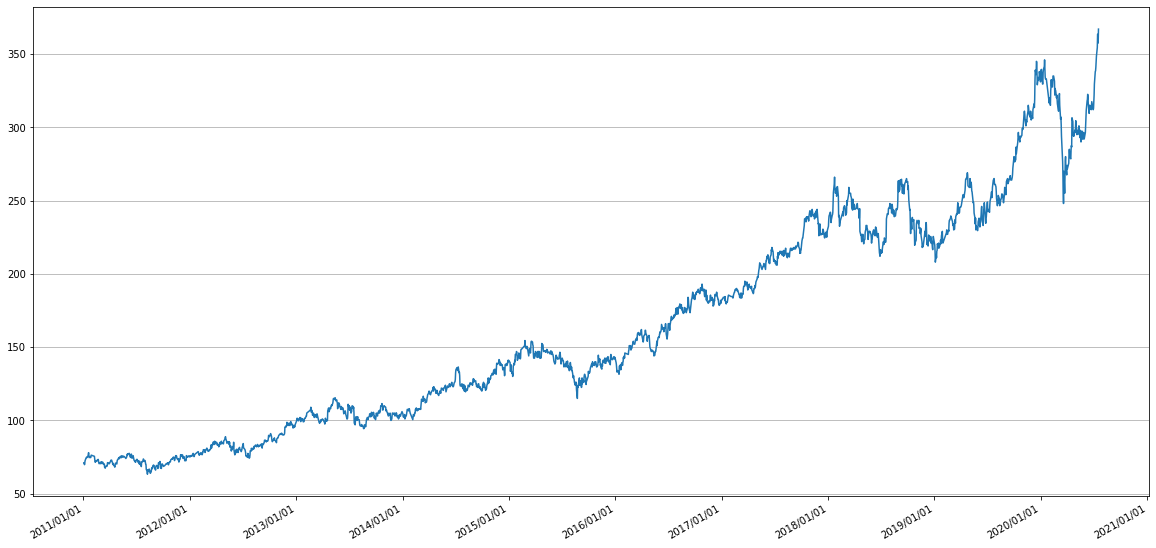

In [4]:
# 繪製價格折線圖 v.2 呼叫函式擴充版
# 加上格線 plt.grid()

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = GetStock('data/TEJ2330.csv')

xs = [line[0] for line in SData]
Price = [line[4] for line in SData]

# 配置横坐標
plt.figure(figsize = (20,10)) # 設定圖形大小
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # x座標每年顯示一次

plt.plot(xs, Price)
plt.gcf().autofmt_xdate()  #自動旋轉日期標記

# plt.grid()   # x 和 y 軸都有格線
plt.grid(axis = 'y')

#顯示繪製圖表
plt.show()

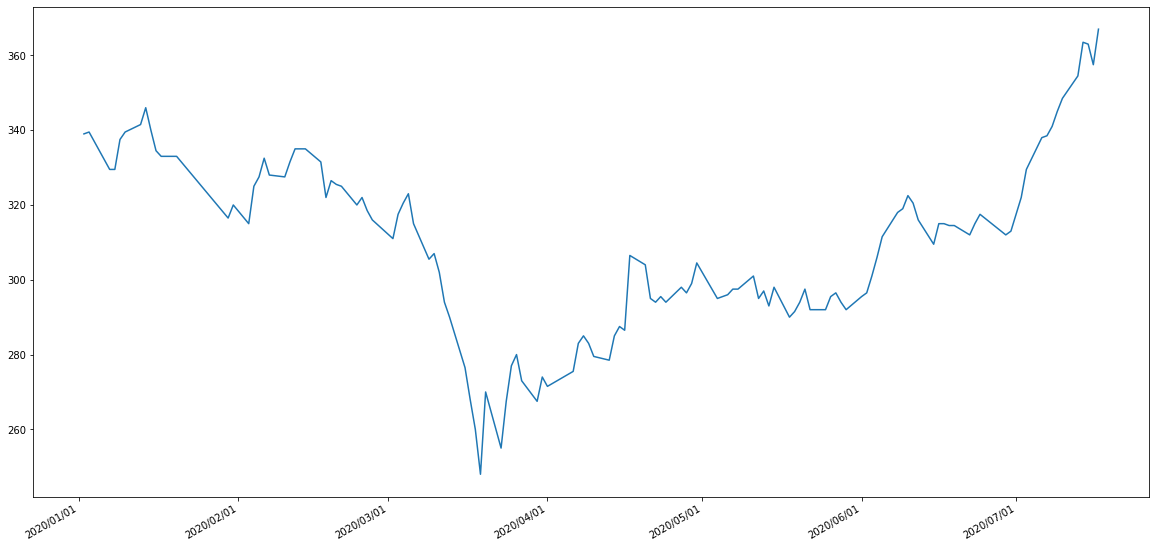

In [204]:
# 繪製價格折線圖 
# 只取部分資料（例如只取2020年的資料），並更改座標軸的文字

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if line[0].year == 2020]  # 只取2020年的資料
# SData = [line for line in SData if line[0].year >= 2015]  # 取2015年之後的資料

xs = [line[0] for line in SData]
Price = [line[4] for line in SData]

# 配置横坐標
plt.figure(figsize = (20,10)) # 設定圖形大小
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次

plt.plot(xs, Price)
plt.gcf().autofmt_xdate()  #自動旋轉日期標記


#顯示繪製圖表
plt.show()

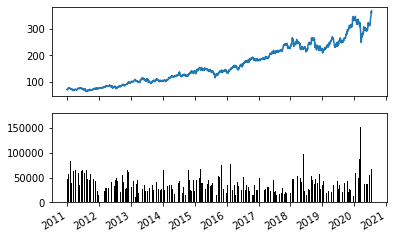

In [5]:
# 繪製價格折線圖與成交量
# 使用 .add_subplot()

# -*- coding: UTF-8 -*-

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
# from backtest_function import GetHistoryData
# 需要複製 backtest_function.py 到相同的資料夾中

from datetime import datetime

SData = GetStock('data/TEJ2330.csv')
xs = [line[0] for line in SData]
Price = [line[4] for line in SData]
QValue = [line[5] for line in SData]


fig = plt.figure(1) 		#第一張圖片 Q             
ax1 = fig.add_subplot(211)

# 配置横座標
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # x座標每年顯示一次
# Plot
ax1.plot(xs, Price)
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

ax2 = fig.add_subplot(212)
# ax2.bar(xs, QValue,width=0.5)
ax2.bar(xs, QValue, color ='black')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()

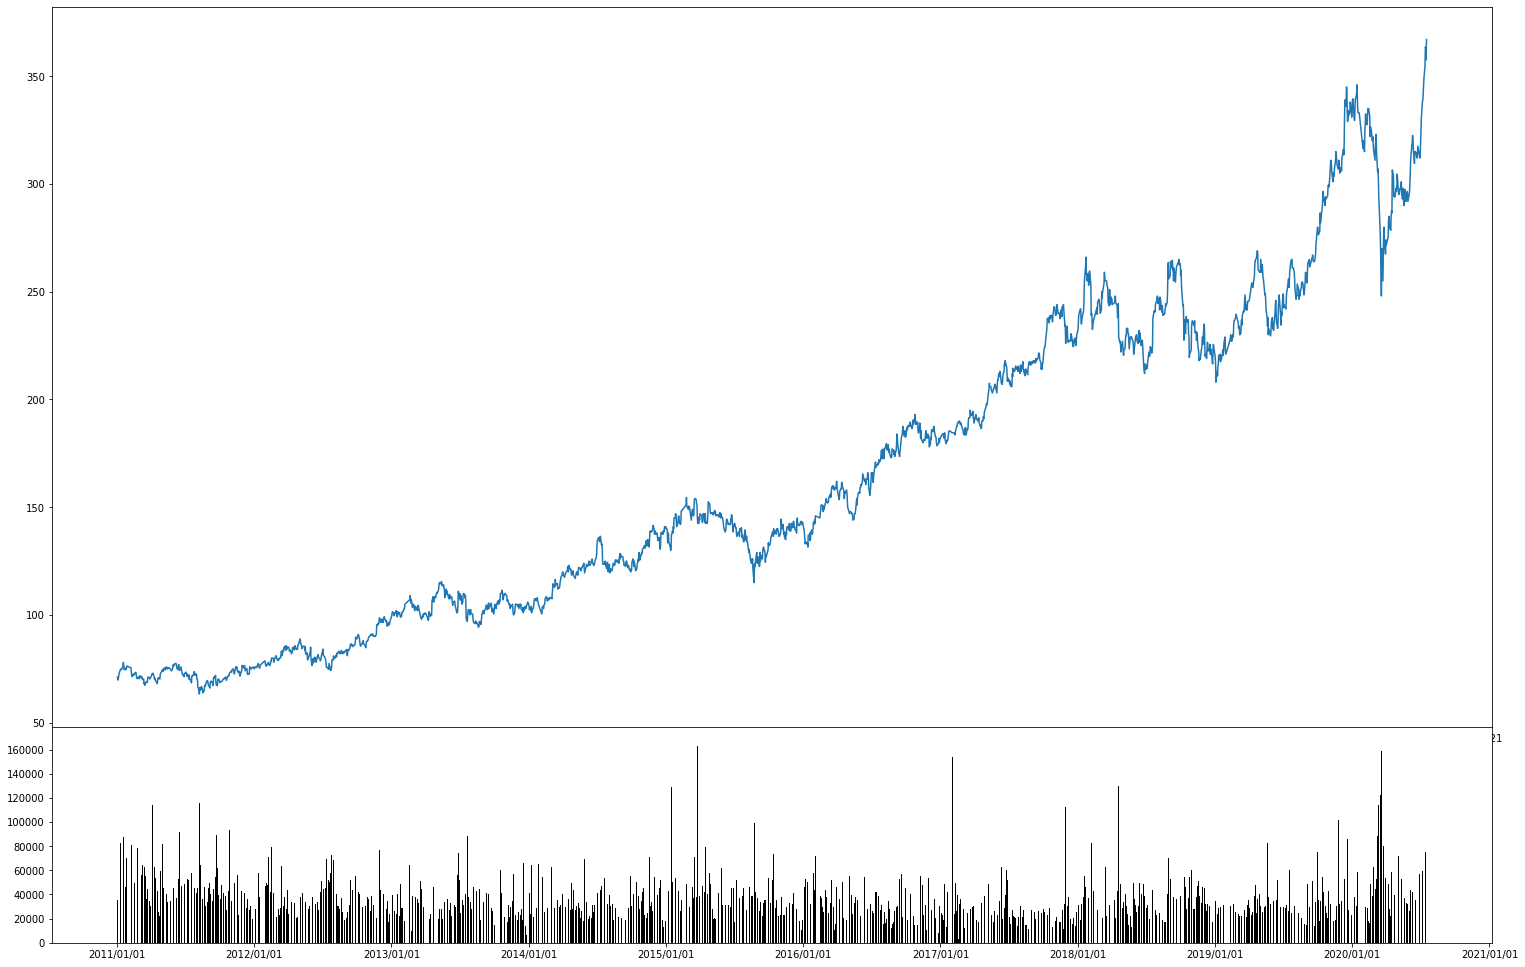

In [7]:
# 繪製價格折線圖與成交量
# 使用 .add_axes()

# -*- coding: UTF-8 -*-

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
# from backtest_function import GetHistoryData
# 需要複製 backtest_function.py 到相同的資料夾中

from datetime import datetime

SData = GetStock('data/TEJ2330.csv')
xs = [line[0] for line in SData]
Price = [line[4] for line in SData]
QValue = [line[5] for line in SData]


fig = plt.figure(figsize = (20,10)) 		#第一張圖片 Q             
# ax1 = fig.add_subplot(211)

ax1 = fig.add_axes([0,0.3,1,1])    #  上方的圖，供繪製股價
ax2 = fig.add_axes([0,0,1,0.3])    #  下方的圖，供繪製量能

# 配置横座標
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # x座標每年顯示一次
# Plot
ax1.plot(xs, Price)
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

# ax2 = fig.add_subplot(212)
# ax2.bar(xs, QValue,width=0.5)
ax2.bar(xs, QValue, color ='black')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()

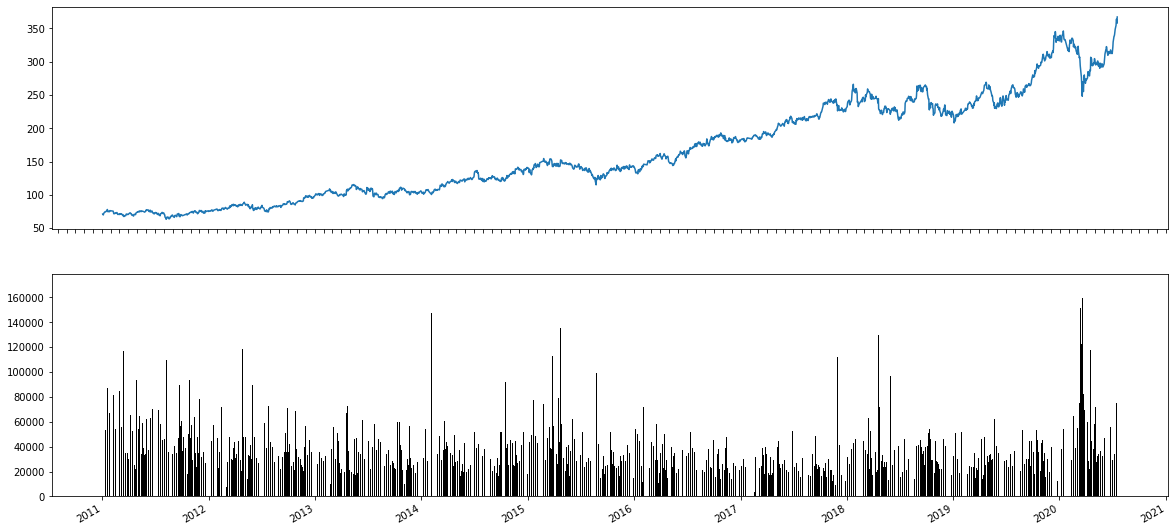

In [75]:
# 繪製價格折線圖與成交量，，調整圖形大小  

# -*- coding: UTF-8 -*-

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
# from backtest_function import GetHistoryData
# 需要複製 backtest_function.py 到相同的資料夾中

from datetime import datetime

SData = GetStock('data/TEJ2330.csv')
xs = [line[0] for line in SData]
Price = [line[4] for line in SData]
QValue = [line[5] for line in SData]


fig = plt.figure(1, figsize = (20,10)) 		#第一張圖片，調整圖形大小           
ax1 = fig.add_subplot(211)

# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次
# Plot
ax1.plot(xs, Price)
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

ax2 = fig.add_subplot(212)
# ax2.bar(xs, QValue,width=1)
ax2.bar(xs, QValue, color ='black')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()


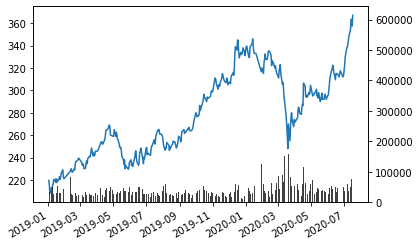

In [32]:
# 用一張圖繪製價格折線圖與成交量

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

SData = GetStock('data/TEJ2330.csv')
xs = [line[0] for line in SData]
Price = [line[4] for line in SData]
QValue = [line[5] for line in SData]


fig = plt.figure(1) 		#第一張圖片           
ax1 = fig.add_subplot(111)

# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次
# Plot
ax1.plot(xs, Price)
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

ax2 = ax1.twinx()     # 設定讓價與量的兩張圖重疊放在一張圖中
ax2.set_ylim([0, max(QValue)*4])  #設定y座標，即量的最大數值，使量的圖顯示在下方
ax2.bar(xs, QValue, color ='black', alpha = 0.75) #alpha為顏色的透明度
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()


## 繪製 K線圖

* 建議使用mplfinance 取代 mpl_finance(書上用這版本，但官方網站已改採前者）
* 之前的 matplotlib提供 finance 模組，可以繪製K線圖，但目前的版本沒有提供
* 以下使用mpl_finance 繪製 K線圖
* https://pypi.org/project/mpl-finance/

In [ ]:
# 繪製 K 線圖需要安裝 mpl_finance 
# 書本說要用以下方法安裝：
# !pip install https://github.com/matplotlib/mpl_finance/archive/mater.zip
# 但是只要使用一下方法即可

!pip install mpl_finance  

## 安裝新版的 mplfinance

In [21]:
!pip install --upgrade mplfinance

In [38]:
# 可刪除
# 繪製K線圖

#載入相關套件及函數
from matplotlib.dates import date2num
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# from mpl_finance import candlestick_ohlc
import mplfinance as mpf
from datetime import datetime
import time
import pandas as pd

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

print(type(SData[0][0]))
#將第一個欄位調整成繪圖格式，必須是數字，所以先用 date2num轉換為數字

KBar = [[date2num(line[0]),line[1], line[2], line[3], line[4], line[5]] for line in SData]

PData = pd.DataFrame(SData, columns=['date', 'open', 'high', 'low', 'close', 'volume', 'amount'])
# PData.index.name = 'Date'
PData.set_index("date" , inplace=True)
# #定義圖表物件
fig = plt.figure(1, figsize = (20,10))

# ax1 = fig.add_subplot()

#繪製K線圖
# candlestick_ohlc(ax1, KBar, width=0.7, colorup='r', colordown='g')
# mpf.plot(KBar,type='bars',volume=True,mav=(20,40))
mpf.plot(PData,type='candle',mav=(7,12))

# #定義x軸時間格式
# hfmt = mdates.DateFormatter('%Y/%m/%d')
# ax1.xaxis.set_major_formatter(hfmt)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

plt.show()

<class 'datetime.date'>


TypeError: Expect data.index as DatetimeIndex

<Figure size 1440x720 with 0 Axes>

In [10]:
# test
# 繪製K線圖

#載入相關套件及函數
from matplotlib.dates import date2num
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf
from datetime import datetime
import time
import numpy as np

import mplfinance as mpf2

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

#將第一個欄位調整成繪圖格式，必須是數字，所以先用 date2num轉換為數字

# KBar = [[date2num(line[0]),line[1], line[2], line[3], line[4], line[5]] for line in SData]
TAKBar = {}
TAKBar['date'] = np.array([line[0] for line in SData])
TAKBar['open'] = np.array([line[1] for line in SData])
TAKBar['high'] = np.array([line[2] for line in SData])
TAKBar['low'] = np.array([line[3] for line in SData])
TAKBar['close'] = np.array([line[4] for line in SData])
TAKBar['volume'] = np.array([line[5] for line in SData])

# #定義圖表物件
# fig = plt.figure(1, figsize = (20,10))

# ax1 = fig.add_subplot()

#繪製K線圖
# mpf.candlestick_ohlc(ax1, KBar, width=0.7, colorup='r', colordown='g')
mpf2.plot(KBar)

#定義x軸時間格式


plt.show()

TypeError: Expect data as DataFrame

C:\Users\User\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


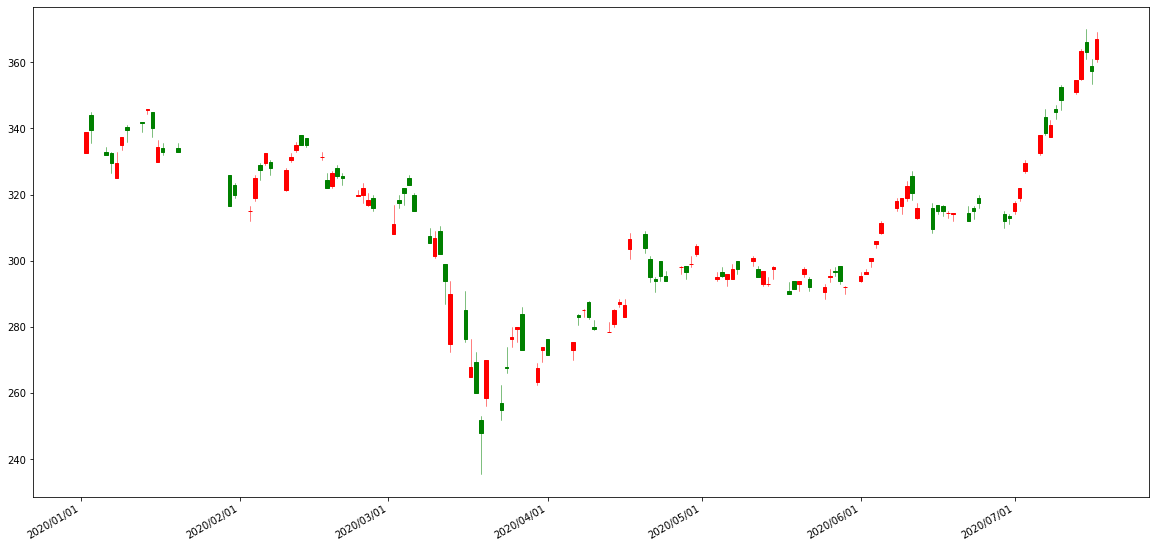

In [6]:
# 繪製K線圖

#載入相關套件及函數
from matplotlib.dates import date2num
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf
from datetime import datetime
import time

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

#將第一個欄位調整成繪圖格式，必須是數字，所以先用 date2num轉換為數字

KBar = [[date2num(line[0]),line[1], line[2], line[3], line[4], line[5]] for line in SData]

# #定義圖表物件
fig = plt.figure(1, figsize = (20,10))

ax1 = fig.add_subplot()

#繪製K線圖
mpf.candlestick_ohlc(ax1, KBar, width=0.7, colorup='r', colordown='g')


#定義x軸時間格式
hfmt = mdates.DateFormatter('%Y/%m/%d')
ax1.xaxis.set_major_formatter(hfmt)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次
plt.gcf().autofmt_xdate()  # 自动旋转日期标记

plt.show()

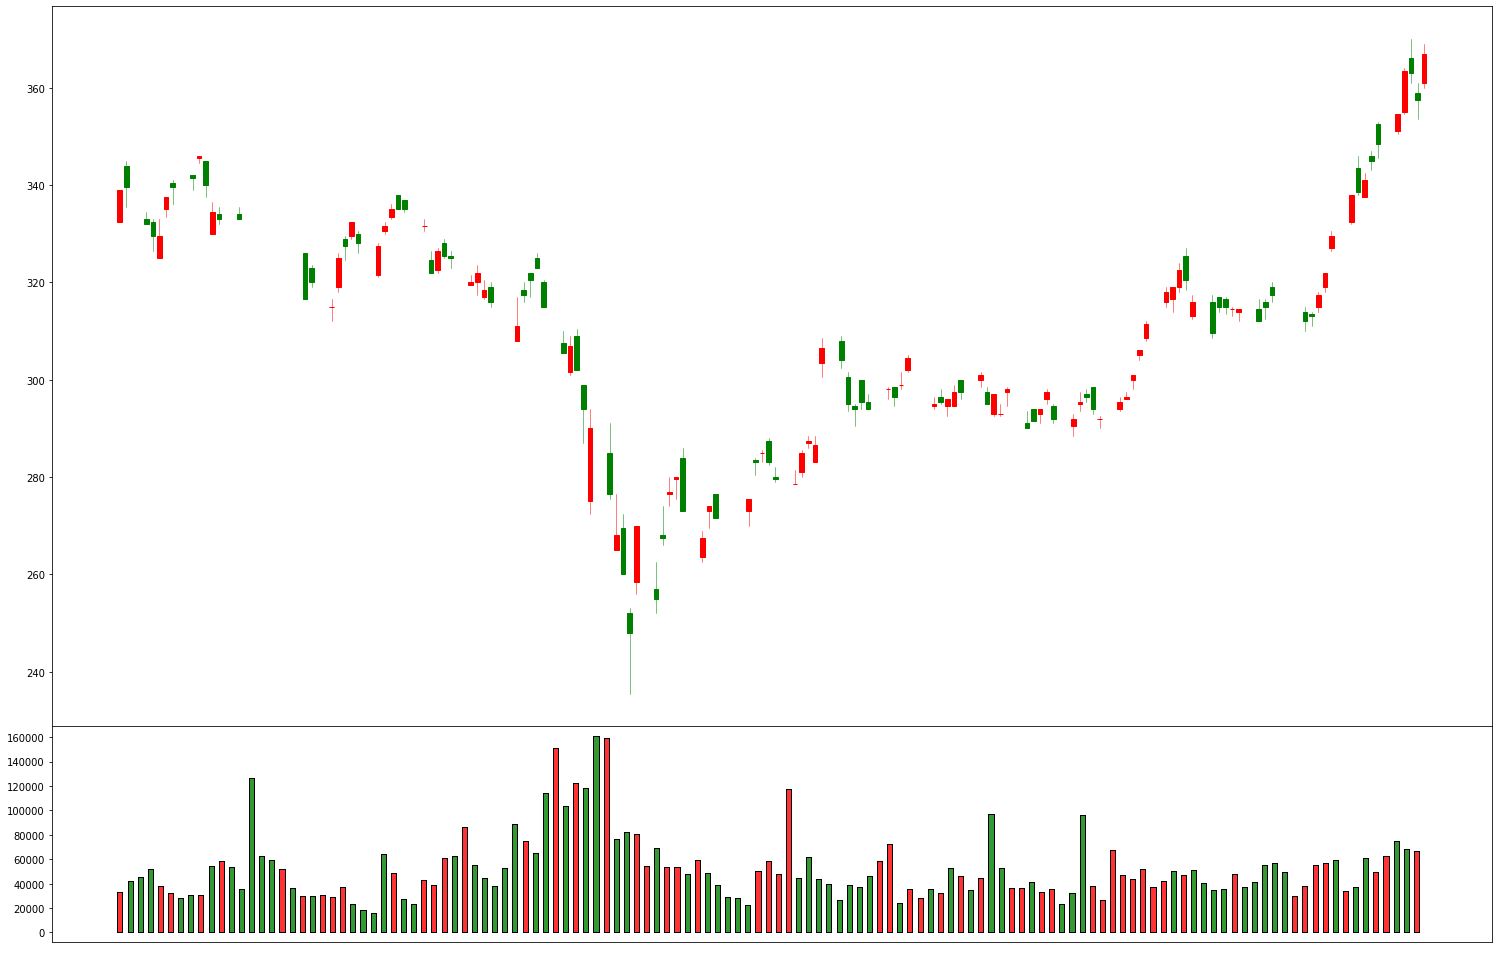

In [19]:
# 繪製K線圖

#載入相關套件及函數
from matplotlib.dates import date2num
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf
from datetime import datetime
import time

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

#將第一個欄位調整成繪圖格式，必須是數字，所以先用 date2num轉換為數字

KBar = [[date2num(line[0]),line[1], line[2], line[3], line[4], line[5]] for line in SData]
Sopen = [line[1] for line in SData]
Sclose = [line[4] for line in SData]
Svolume = [line[5] for line in SData]

# #定義圖表物件
fig = plt.figure(1, figsize = (20,10))

# ax1 = fig.add_subplot()
ax1 = fig.add_axes([0,0.3,1,1])    #  上方的圖，供繪製股價
ax2 = fig.add_axes([0,0,1,0.3])    #  下方的圖，供繪製量能

#繪製K線圖
mpf.candlestick_ohlc(ax1, KBar, width=0.7, colorup='r', colordown='g')

#定義x軸時間格式
hfmt = mdates.DateFormatter('%Y/%m/%d')
ax1.xaxis.set_major_formatter(hfmt)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次
plt.gcf().autofmt_xdate()  # 自动旋转日期标记

# mpf.volume_overlay(ax2, df[‘open’], df[‘close’], df[‘capacity’], colorup=’r’, colordown=’g’, width=0.5, alpha=0.8)
# mpf.volume_overlay(ax2, Sopen, Sclose, Svolume, colorup=’r’, colordown=’g’, width=0.5, alpha=0.8)
mpf.volume_overlay(ax2, Sopen, Sclose, Svolume, colorup='r', colordown='g', width=0.5, alpha=0.8)
plt.show()

## 繪製價格與MA重疊圖表

In [32]:
# 5日MA的算法，方法一
# Lai
# 前面四個數的平均皆有平均


price = [i for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
    print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)
print('原始數字', price)
print('5日的MA:', MA)

近五個數字: [1]
近五個數字: [1, 2]
近五個數字: [1, 2, 3]
近五個數字: [1, 2, 3, 4]
近五個數字: [1, 2, 3, 4, 5]
近五個數字: [2, 3, 4, 5, 6]
近五個數字: [3, 4, 5, 6, 7]
近五個數字: [4, 5, 6, 7, 8]
近五個數字: [5, 6, 7, 8, 9]
近五個數字: [6, 7, 8, 9, 10]
近五個數字: [7, 8, 9, 10, 11]
近五個數字: [8, 9, 10, 11, 12]
近五個數字: [9, 10, 11, 12, 13]
近五個數字: [10, 11, 12, 13, 14]
近五個數字: [11, 12, 13, 14, 15]
近五個數字: [12, 13, 14, 15, 16]
近五個數字: [13, 14, 15, 16, 17]
近五個數字: [14, 15, 16, 17, 18]
近五個數字: [15, 16, 17, 18, 19]
原始數字 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
5日的MA: [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [296]:
# 5日MA的算法，方法二
# Lai
# 前面四個數不取平均

price = [i for i in range(1, 20)]

MA2 = [np.nan] * 4
for i in range(4, len(price)):
    MA2.append((sum(price[i-4:i+1])/MAlen))
print(price)
print(MA2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[nan, nan, nan, nan, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


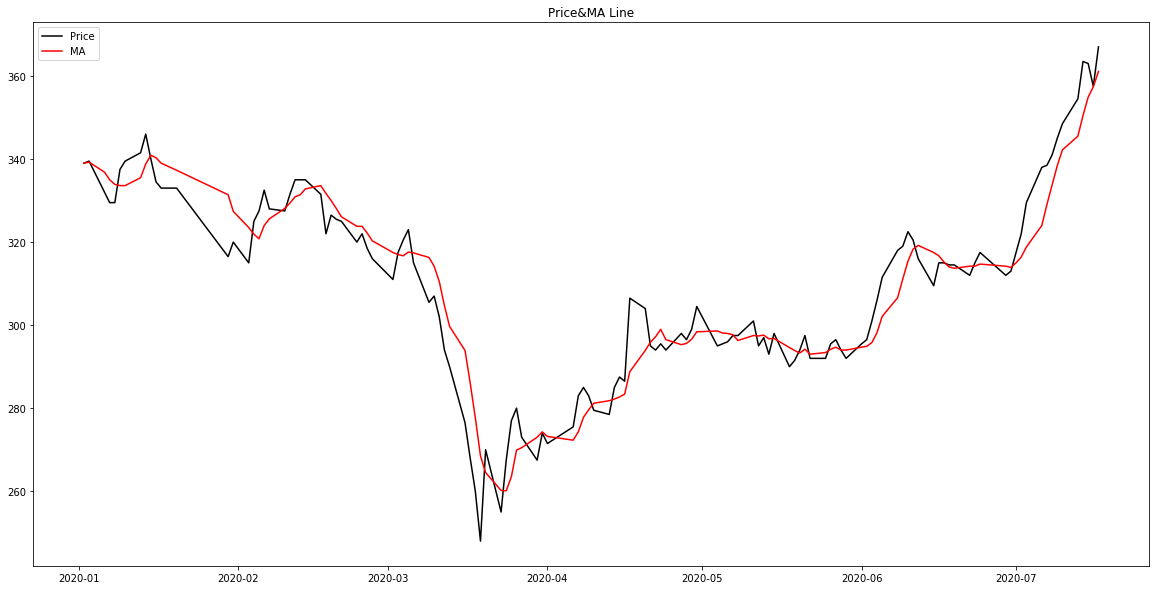

In [206]:
# 繪製價格與MA重疊圖表
# 自行計算

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np


SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

price = [float(line[4]) for line in SData]
date = [line[0] for line in SData]

MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
    
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)

plt.figure(figsize = (20,10)) # 設定圖形大小
# 繪製價格折線圖
plt.plot_date(date, price, 'k-', label="Price")
# 繪製MA折線圖
plt.plot_date(date, MA, 'r-', label="MA")

plt.legend()    #圖例位置以預設方式呈現
#定義title
plt.title('Price&MA Line')

plt.show()


## Talib 套件： 金融領域的指標套件

## 安裝 ta-lib 套件
* 影音教學：https://www.youtube.com/watch?v=EDemyRWImWo
* 可參考 http://yhhuang1966.blogspot.com/2018/05/python-ta-lib.html
* https://medium.com/ai%E8%82%A1%E4%BB%94/%E7%94%A8-python-%E5%BF%AB%E9%80%9F%E8%A8%88%E7%AE%97-158-%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-26f9579b8f3a

### 步驟一：查看python的版本
* 套件名稱 -V
* 套件名稱 --version
    * !python -V

### 步驟二：Talib 套件安裝
*　從以下網站下載合適的版本到目前使用的資料夾（例如：C:\使用者）:
   https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
        
* 用anaconda prompt 安裝：
    * pip install 下載下來的檔案名稱
    * !pip install TA_Lib‑0.4.18‑cp37‑cp37m‑win_amd64.whl （在jupyter notebook中使用）
    

## talib 模組簡介


### talib 函式分類
* Function API
    * 依照其功能來決定輸入值，因此不同函式的輸入值可能不同
* Abstract API
    * 皆採用相同的輸入值，即股票的開盤、收盤、最高、最低、成交量等資料
    * 輸入值為字典（字典的value為numpy的ndarray型別）或pandas的dataframes型別：建議初學者使用字典的方式，進階者可採用dataframes
    * 建議採用此種方式(本教材使用）

In [ ]:
### Abstract API 使用方式：
* 函式呼叫：傳入值為字典（dictionary)的格式，字典的value為numpy的array型別
    * TAKBar['date'] = np.array([line[0] for line in SData])
    * TAKBar['open'] = np.array([line[1] for line in SData])
    * TAKBar['high'] = np.array([line[2] for line in SData])
    * TAKBar['low'] = np.array([line[3] for line in SData])
    * TAKBar['close'] = np.array([line[4] for line in SData])
    * TAKBar['volume'] = np.array([line[5] for line in SData])  
    
          
    * MAvalue = abstract.SMA(TAKBar) # 呼叫MA函式
    
    * 傳入的字典的內容可以依照需要，輸入使用到的key，例如移動平均線MA只需要使用到日期和收盤價，則只要傳入日期time和收盤價close等兩個key即可
    * 傳入值也可以是float或是double格式的list

In [334]:
# 製作talib所需要的資料格式：dictionary


import numpy as np

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料
TAKBar = {}
TAKBar['date'] = np.array([line[0] for line in SData])
TAKBar['open'] = np.array([line[1] for line in SData])
TAKBar['high'] = np.array([line[2] for line in SData])
TAKBar['low'] = np.array([line[3] for line in SData])
TAKBar['close'] = np.array([line[4] for line in SData])
TAKBar['volume'] = np.array([line[5] for line in SData])
print(TAKBar)


{'date': array([datetime.date(2020, 1, 2), datetime.date(2020, 1, 3),
       datetime.date(2020, 1, 6), datetime.date(2020, 1, 7),
       datetime.date(2020, 1, 8), datetime.date(2020, 1, 9),
       datetime.date(2020, 1, 10), datetime.date(2020, 1, 13),
       datetime.date(2020, 1, 14), datetime.date(2020, 1, 15),
       datetime.date(2020, 1, 16), datetime.date(2020, 1, 17),
       datetime.date(2020, 1, 20), datetime.date(2020, 1, 30),
       datetime.date(2020, 1, 31), datetime.date(2020, 2, 3),
       datetime.date(2020, 2, 4), datetime.date(2020, 2, 5),
       datetime.date(2020, 2, 6), datetime.date(2020, 2, 7),
       datetime.date(2020, 2, 10), datetime.date(2020, 2, 11),
       datetime.date(2020, 2, 12), datetime.date(2020, 2, 13),
       datetime.date(2020, 2, 14), datetime.date(2020, 2, 17),
       datetime.date(2020, 2, 18), datetime.date(2020, 2, 19),
       datetime.date(2020, 2, 20), datetime.date(2020, 2, 21),
       datetime.date(2020, 2, 24), datetime.date(2020, 2,

In [335]:
# 上例改為函式

def GetStock_dic(file_name):
    import numpy as np

    SData = GetStock(file_name)
    stock = {}
    stock['date'] = np.array([line[0] for line in SData])
    stock['open'] = np.array([line[1] for line in SData])
    stock['high'] = np.array([line[2] for line in SData])
    stock['low'] = np.array([line[3] for line in SData])
    stock['close'] = np.array([line[4] for line in SData])
    stock['volume'] = np.array([line[5] for line in SData])
    
    return stock

In [336]:
# 移動平均值 SMA

stock = GetStock_dic('data/TEJ2330.csv')
from talib import abstract
MAvalue = abstract.SMA(stock)    # timeperiod 為日（月，或年）數的移動平均數，預設為5日
print(MAvalue[:30])

[  nan   nan   nan   nan 71.12 71.74 72.4  73.42 74.14 74.6  74.92 75.38
 76.   76.36 76.32 76.22 75.86 75.18 74.94 75.28 75.32 75.08 74.56 73.8
 73.04 72.44 72.1  72.2  72.52 72.7 ]


In [337]:
# 移動平均值 SMA

stock = GetStock_dic('data/TEJ2330.csv')
from talib import abstract
MAvalue = abstract.SMA(stock, timeperiod = 20)    # timeperiod 為日（月，或年）數的移動平均數
print(MAvalue[:100])

[   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan 74.33
 74.55  74.68  74.79  74.81  74.81  74.725 74.605 74.485 74.405 74.335
 74.17  73.88  73.505 73.21  73.05  72.805 72.595 72.455 72.24  72.
 71.795 71.63  71.53  71.475 71.25  71.05  70.815 70.605 70.405 70.165
 69.975 69.895 69.93  69.955 69.925 69.92  69.91  69.855 69.955 70.02
 70.095 70.125 70.13  70.15  70.24  70.275 70.355 70.345 70.385 70.49
 70.6   70.645 70.6   70.665 70.775 70.92  71.12  71.275 71.37  71.48
 71.61  71.775 72.02  72.27  72.575 72.86  73.19  73.55  73.82  74.06
 74.27  74.495 74.705 74.8   74.85  74.945 75.05  75.21  75.29  75.4  ]


In [338]:
def GetStock_dic2000(file_name):
    import numpy as np

    SData = GetStock(file_name)
    SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

    stock = {}
    stock['date'] = np.array([line[0] for line in SData])
    stock['open'] = np.array([line[1] for line in SData])
    stock['high'] = np.array([line[2] for line in SData])
    stock['low'] = np.array([line[3] for line in SData])
    stock['close'] = np.array([line[4] for line in SData])
    stock['volume'] = np.array([line[5] for line in SData])
    
    return stock

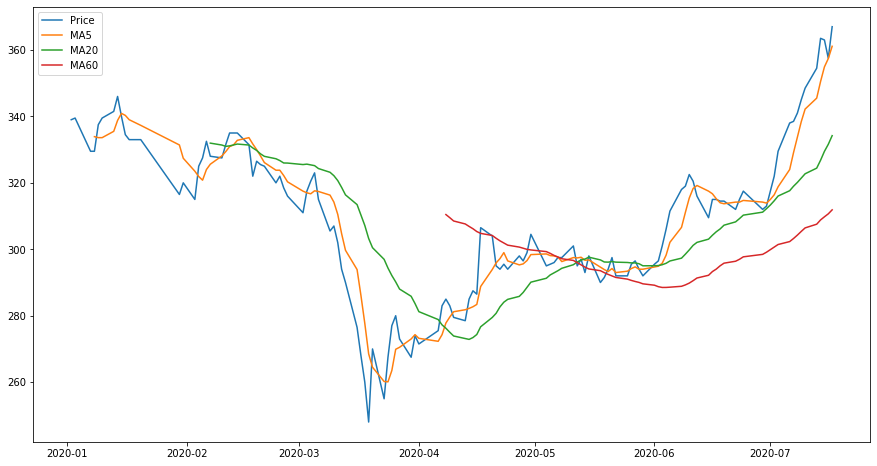

In [341]:
# 繪出股價的日線、5日線（SMA5)、月線(SMA20)、季線(SMA60)

import matplotlib.pyplot as plt
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')

MA5 = abstract.SMA(stock, timeperiod = 5)      # SMA5
MA20 = abstract.SMA(stock, timeperiod = 20)    # SMA20
MA60 = abstract.SMA(stock, timeperiod = 60)    # SMA60
price = [dt for dt in stock['close']]
date =  [dt for dt in stock['date']]

plt.figure(figsize = (15,8)) # 設定圖形大小
plt.plot(date, price, label = 'Price')
plt.plot(date, MA5, label = 'MA5')
plt.plot(date, MA20, label = 'MA20')
plt.plot(date, MA60, label = 'MA60')
plt.legend()
plt.show()

## 布林通道

In [5]:
# test 
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')
upper, middle, lower = abstract.BBANDS(stock)
# print(upper)
# print(middle)
# print(lower)

# print(upper[:10])
print(stock)

AttributeError: 'str' object has no attribute 'year'

In [342]:
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')
upper, middle, lower = abstract.BBANDS(stock)
print(upper)
print(middle)
print(lower)

print(upper[:10])

[         nan          nan          nan          nan 342.83084542
 341.9042158  341.9042158  345.61928851 349.67382178 346.60613705
 347.69188745 348.48683298 347.41137973 347.16578574 342.54463601
 339.3492902  334.95986217 330.40416576 336.08304597 337.25160933
 332.97442304 333.70813185 336.53560112 337.89307323 338.75315043
 337.02928564 341.77174265 340.13903348 337.29565115 332.27737808
 328.64148737 328.64148737 327.66260011 326.41882342 325.08946638
 324.183314   323.10624695 325.78290902 325.77615664 328.37642331
 328.20856881 325.62613632 318.3762568  312.93026833 314.9751038
 310.5981632  303.40291812 297.05170748 284.07549489 276.51686244
 276.22947612 284.53330692 287.34018349 288.11817244 283.01998004
 282.68093074 281.31418511 277.76260011 284.54890238 288.31855503
 289.98075142 287.91118469 286.64148737 287.66260011 289.41118469
 290.78647413 307.57871135 312.56976165 312.33654465 311.68585517
 309.37304198 304.08946638 298.23938769 298.65941171 300.14400903
 305.368500

In [1]:
# 取出布林通道的上下界和MA

from talib import abstract
import matplotlib.pyplot as plt

stock = GetStock_dic2000('data/TEJ2330.csv')
upper, middle, lower = abstract.BBANDS(stock)   # 取出布林通道的上下界和MA
print(upper)

date = [line[0] for line in SData]
price = [line[4] for line in SData]

plt.plot(date, middle)
plt.plot(date, upper)
plt.plot(date, lower)
plt.plot(date, price)
plt.show()


NameError: name 'GetStock_dic2000' is not defined

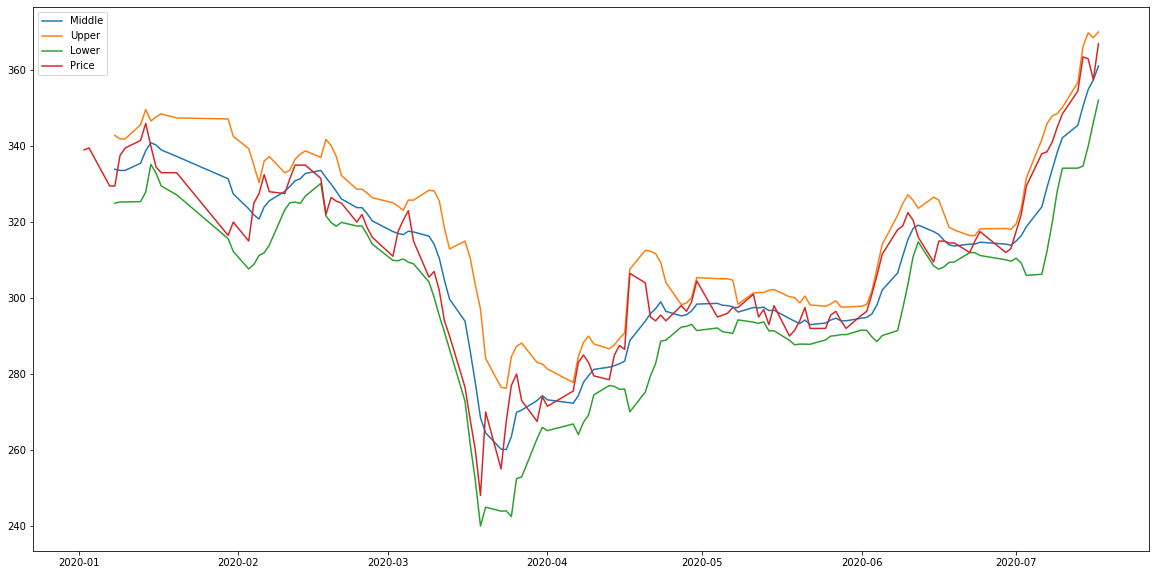

In [303]:
# 同上一程式，加上圖例

from talib import abstract
import matplotlib.pyplot as plt

upper, middle, lower = abstract.BBANDS(TAKBar)

date = [line[0] for line in SData]
price = [line[4] for line in SData]

plt.figure(figsize = (20,10)) # 設定圖形大小
plt.plot(date, middle, label="Middle")
plt.plot(date, upper, label="Upper")
plt.plot(date, lower, label="Lower")
plt.plot(date, price, label="Price")
plt.legend()    #圖例位置以預設方式呈現
plt.show()


In [141]:
# 計算移動平均值MA
# 使用自己計算和呼叫talib的MA函式等兩種方式

from talib.abstract import *
import numpy as np

price = [float(i) for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
#     print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)

print(MA)

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

TAKBar = {}
TAKBar['close'] = np.array(price)

from talib.abstract import *
MAvalue = MA(TAKBar, timeperiod = 5)    # timeperiod 為日（月，或年）數的移動平均數，預設為30日
print(MAvalue)

MAvalue2 = MA(TAKBar['close'], timeperiod = 5)    # 傳入一個float型別的list到 MA函式
print(MAvalue2)
print(type(TAKBar['close']))


[1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
[nan nan nan nan  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
[nan nan nan nan  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
<class 'numpy.ndarray'>


In [208]:
# 計算移動平均值MA (使用傳入的參數為一list)
# 使用自己計算和呼叫talib的MA函式等兩種方式

import talib
import numpy as np

price = [float(i) for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
#     print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)

print(MA)

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

TAKBar = {}
TAKBar['close'] = np.array(price)

# MAvalue = talib.MA(TAKBar, timeperiod = 5)    # timeperiod 為日（月，或年）數的移動平均數，預設為30日
# print(MAvalue)

MAvalue2 = talib.MA(TAKBar['close'], timeperiod = 5)    # 傳入一個float型別的list到 MA函式
print(MAvalue2)
print(type(TAKBar['close']))

[1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
[nan nan nan nan  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
<class 'numpy.ndarray'>


In [152]:
# 列出talib 所有的 Function API 

import talib

all_ta_groups = talib.get_function_groups()
# print(all_ta_groups)
for keys, indexs in all_ta_groups.items():
    print("keys:", keys)
    for index in indexs:
        print('\tindex:', index)
        

keys: Cycle Indicators
	index: HT_DCPERIOD
	index: HT_DCPHASE
	index: HT_PHASOR
	index: HT_SINE
	index: HT_TRENDMODE
keys: Math Operators
	index: ADD
	index: DIV
	index: MAX
	index: MAXINDEX
	index: MIN
	index: MININDEX
	index: MINMAX
	index: MINMAXINDEX
	index: MULT
	index: SUB
	index: SUM
keys: Math Transform
	index: ACOS
	index: ASIN
	index: ATAN
	index: CEIL
	index: COS
	index: COSH
	index: EXP
	index: FLOOR
	index: LN
	index: LOG10
	index: SIN
	index: SINH
	index: SQRT
	index: TAN
	index: TANH
keys: Momentum Indicators
	index: ADX
	index: ADXR
	index: APO
	index: AROON
	index: AROONOSC
	index: BOP
	index: CCI
	index: CMO
	index: DX
	index: MACD
	index: MACDEXT
	index: MACDFIX
	index: MFI
	index: MINUS_DI
	index: MINUS_DM
	index: MOM
	index: PLUS_DI
	index: PLUS_DM
	index: PPO
	index: ROC
	index: ROCP
	index: ROCR
	index: ROCR100
	index: RSI
	index: STOCH
	index: STOCHF
	index: STOCHRSI
	index: TRIX
	index: ULTOSC
	index: WILLR
keys: Overlap Studies
	index: BBANDS
	index: DEMA
	ind

In [155]:
import talib
import pandas as pd
table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
print(table)

                技術指標類別名稱  該類別指標總數
0       Cycle Indicators        5
1         Math Operators       11
2         Math Transform       15
3    Momentum Indicators       30
4        Overlap Studies       17
5    Pattern Recognition       61
6        Price Transform        4
7    Statistic Functions        9
8  Volatility Indicators        3
9      Volume Indicators        3


In [ ]:
import talib
import pandas as pd
table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
print(table)

In [156]:
# talib 的
from talib import abstract

all_ta_groups = abstract.get_function_groups()
# print(all_ta_groups)
for keys, indexs in all_ta_groups.items():
    print("keys:", keys)
    for index in indexs:
        print('\tindex:', index)
        

AttributeError: module 'talib.abstract' has no attribute 'get_function_groups'

## 參考函式如何使用

In [212]:
# 列出talib 中函式的參數、輸入與輸出的值

from talib import abstract
print(abstract.MA)
print()
print(abstract.BBANDS)

MA([input_arrays], [timeperiod=5], [matype=0])

Moving average (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 5
    matype: 0 (Simple Moving Average)
Outputs:
    real

BBANDS([input_arrays], [timeperiod=5], [nbdevup=2], [nbdevdn=2], [matype=0])

Bollinger Bands (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 5
    nbdevup: 2
    nbdevdn: 2
    matype: 0 (Simple Moving Average)
Outputs:
    upperband
    middleband
    lowerband


In [ ]:
# https://markjong001.pixnet.net/blog/post/249471859-python-%E9%87%8F%E5%8C%96%E5%88%86%E6%9E%90%E7%9A%84%E5%A5%BD%E5%88%A9%E5%99%A8-%22ta-lib%22

SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)     ## STOCH是 KD 線

plot_candles(
             start_time='2017-01-01',      ## 開始時間
             end_time='2018-01-01',       ## 結束時間
             pricing=df,                            ## dataframe 只吃 ['open_price', 'close_price', 'high', 'low', 'volume']
             title='Candles',                      ## 名稱而已
             volume_bars=True,               ## 畫不畫 量圖
             overlays=[SMA],                    ##  跟股價圖 疊起來的是什麼指標
             technicals = [RSI, STOCH],    ## 其他圖要畫甚麼
             technicals_titles=['RSI', 'KD'] ## 其他圖的名稱
            )

## 操作績效

In [ ]:
'''
    [0]: 'date'
    [1]: 'open'
    [2]: 'high'
    [3]: 'low'
    [4]: 'close'
    [5]: 'volume'
    [6]: 'amount'
'''

In [349]:
# 2020年7月操作績效
# 每日開盤價買進，收盤價賣出，操作績效

a = GetStock('data/TEJ2330.csv')
a1 = [data for data in a if (data[0].year == 2020) and (data[0].month == 7)]

Sopen = [i[1] for i in a1]
Sclose = [i[4] for i in a1]
print('opened price:', Sopen)
print('closed price:', Sclose)

profit = []

for i in range(len(a1)):
    profit.append(Sclose[i] - Sopen[i])

print('profit:', profit)
print('sum of profit:', sum(profit))
print('transation time:', len(profit))
print('average profit:', sum(profit)/len(profit))

# 設定輸出的格式
print("average profit: %.2f" % (sum(profit)/len(profit)))        # 取 2位小數
print("average profit: ${:>.1f}".format(sum(profit)/len(profit))) # 取 1位小數


opened price: [315.0, 319.0, 327.0, 332.5, 343.5, 337.5, 346.0, 352.5, 351.0, 355.0, 366.0, 359.0, 361.0]
closed price: [317.5, 322.0, 329.5, 338.0, 338.5, 341.0, 345.0, 348.5, 354.5, 363.5, 363.0, 357.5, 367.0]
profit: [2.5, 3.0, 2.5, 5.5, -5.0, 3.5, -1.0, -4.0, 3.5, 8.5, -3.0, -1.5, 6.0]
sum of profit: 20.5
transation time: 13
average profit: 1.5769230769230769
average profit: 1.58
average profit: $1.6


In [350]:
# 2020年整年操作績效
# 操作原則：每日開盤價買進，收盤價賣出，操作績效

a = GetStock('data/TEJ2330.csv')
a1 = [data for data in a if (data[0].year == 2020)]

Sopen = [i[1] for i in a1]
Sclose = [i[4] for i in a1]
print('opened price:', Sopen)
print('closed price:', Sclose)

profit = []

for i in range(len(a1)):
    profit.append(Sclose[i] - Sopen[i])

print('profit:', profit)
print('sum of profit:', sum(profit))
print('transation time:', len(profit))
print('average profit:', sum(profit)/len(profit))

# 設定輸出的格式
print("average profit: %.2f" % (sum(profit)/len(profit)))        # 取 2位小數
print("average profit: ${:>.3f}".format(sum(profit)/len(profit))) # 取 3位小數


opened price: [332.5, 344.0, 333.0, 332.5, 325.0, 335.0, 340.5, 342.0, 345.5, 345.0, 330.0, 334.0, 334.0, 326.0, 323.0, 315.0, 319.0, 329.0, 329.5, 330.0, 321.5, 330.5, 333.5, 338.0, 337.0, 331.5, 324.5, 322.5, 328.0, 325.5, 319.5, 320.0, 317.0, 319.0, 308.0, 318.5, 322.0, 325.0, 320.0, 307.5, 301.5, 309.0, 299.0, 275.0, 285.0, 265.0, 269.5, 252.0, 258.5, 257.0, 268.0, 276.5, 279.5, 284.0, 263.5, 273.0, 276.5, 273.0, 283.5, 285.0, 287.5, 280.0, 278.5, 281.0, 287.0, 283.0, 303.5, 308.0, 300.5, 294.5, 300.0, 295.5, 298.0, 298.5, 299.0, 302.0, 294.5, 296.5, 294.5, 294.5, 300.0, 300.0, 297.5, 293.0, 293.0, 297.5, 291.0, 294.0, 293.0, 296.0, 294.5, 290.5, 295.0, 297.0, 298.5, 292.0, 294.0, 296.0, 300.0, 305.0, 308.5, 316.0, 316.5, 319.0, 325.5, 313.0, 316.0, 317.0, 316.5, 314.5, 314.0, 314.5, 316.0, 319.0, 314.0, 313.5, 315.0, 319.0, 327.0, 332.5, 343.5, 337.5, 346.0, 352.5, 351.0, 355.0, 366.0, 359.0, 361.0]
closed price: [339.0, 339.5, 332.0, 329.5, 329.5, 337.5, 339.5, 341.5, 346.0, 340.

In [282]:
# 2020年整年操作績效
# 操作原則：每日開盤價若較前一日漲價則買進，收盤價賣出，操作績效

a = GetStock('data/TEJ2330.csv')
a1 = [data for data in a if (data[0].year == 2020)]

Sopen = [i[1] for i in a1]
Sclose = [i[4] for i in a1]
# print('opened price:', Sopen)
# print('closed price:', Sclose)

profit = []

for i in range(1, len(a1)):
    if (Sopen[i] > Sclose[i-1]):
        profit.append(Sclose[i] - Sopen[i])
        

# print('profit:', profit)
print('sum of profit:', sum(profit))
print('transation time:', len(profit))
print('average profit:', sum(profit)/len(profit))

# 設定輸出的格式
print("average profit: %.2f" % (sum(profit)/len(profit)))        # 取 2位小數
print("average profit: ${:>.3f}".format(sum(profit)/len(profit))) # 取 3位小數


sum of profit: -26.5
transation time: 66
average profit: -0.4015151515151515
average profit: -0.40
average profit: $-0.402


sum of profit: -26.5
transation time: 66
average profit: -0.4015151515151515
average profit: -0.40
[332.5]
[332.5, 344.0]
[332.5, 344.0, 333.0]
[332.5, 344.0, 333.0, 332.5]
[332.5, 344.0, 333.0, 332.5, 325.0]
[344.0, 333.0, 332.5, 325.0, 335.0]
[333.0, 332.5, 325.0, 335.0, 340.5]
[332.5, 325.0, 335.0, 340.5, 342.0]
[325.0, 335.0, 340.5, 342.0, 345.5]
[335.0, 340.5, 342.0, 345.5, 345.0]
[340.5, 342.0, 345.5, 345.0, 330.0]
[342.0, 345.5, 345.0, 330.0, 334.0]
[345.5, 345.0, 330.0, 334.0, 334.0]
[345.0, 330.0, 334.0, 334.0, 326.0]
[330.0, 334.0, 334.0, 326.0, 323.0]
[334.0, 334.0, 326.0, 323.0, 315.0]
[334.0, 326.0, 323.0, 315.0, 319.0]
[326.0, 323.0, 315.0, 319.0, 329.0]
[323.0, 315.0, 319.0, 329.0, 329.5]
[315.0, 319.0, 329.0, 329.5, 330.0]
[319.0, 329.0, 329.5, 330.0, 321.5]
[329.0, 329.5, 330.0, 321.5, 330.5]
[329.5, 330.0, 321.5, 330.5, 333.5]
[330.0, 321.5, 330.5, 333.5, 338.0]
[321.5, 330.5, 333.5, 338.0, 337.0]
[330.5, 333.5, 338.0, 337.0, 331.5]
[333.5, 338.0, 337.0, 331.5, 324.5]

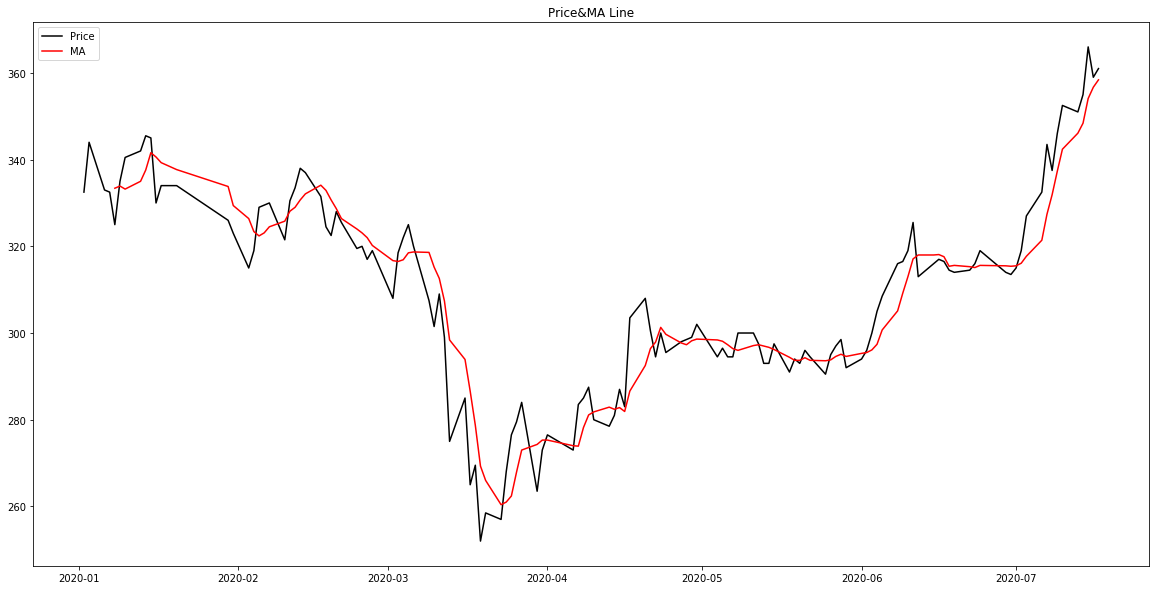

[332.5, 344.0, 333.0, 332.5, 325.0, 335.0, 340.5, 342.0, 345.5, 345.0]
[nan, nan, nan, nan, 333.4, 333.9, 333.2, 335.0, 337.6, 341.6]
[332.5, 344.0, 333.0, 332.5, 325.0, 335.0, 340.5, 342.0, 345.5, 345.0]
[nan, nan, nan, nan, 333.4, 333.9, 333.2, 335.0, 337.6, 341.6]


In [292]:
# 未完成
# 2020年整年操作績效
# 操作原則：收盤價突破 MA5，隔日開盤價買進；跌破 MA5，隔日開盤價賣出

a = GetStock('data/TEJ2330.csv')
a1 = [data for data in a if (data[0].year == 2020)]

Sopen = [i[4] for i in a1]
Sclose = [i[1] for i in a1]
profit = []

for i in range(1, len(a1)):
    if (Sopen[i] > Sclose[i-1]):
        profit.append(Sclose[i] - Sopen[i])
        

# print('profit:', profit)
print('sum of profit:', sum(profit))
print('transation time:', len(profit))
print('average profit:', sum(profit)/len(profit))

# 設定輸出的格式
print("average profit: %.2f" % (sum(profit)/len(profit)))        # 取 2位小數

# 繪製價格與MA重疊圖表

#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np


date = [line[0] for line in SData]


plt.figure(figsize = (20,10)) # 設定圖形大小
# 繪製價格折線圖
plt.plot_date(date, Sclose, 'k-', label="Price")
# 繪製MA折線圖
plt.plot_date(date, MA, 'r-', label="MA")

plt.legend()    #圖例位置以預設方式呈現
#定義title
plt.title('Price&MA Line')

plt.show()

print(Sclose[:10])
print(MA[:10])

MA2 = [np.nan] * 4
for i in range(4, len(Sclose)):
    MA2.append((sum(Sclose[i-4:i+1])/MAlen))
print(Sclose[:10])
print(MA2[:10])


2020-02-04 315.0 327.4 325.0 323.5
2020-03-04 317.5 317.5 320.5 317.0
2020-03-20 248.0 277.7 270.0 268.5
2020-03-24 255.0 264.5 267.5 260.2
2020-03-31 267.5 270.5 274.0 273.0
2020-04-06 271.5 274.3 275.5 273.2
2020-04-14 278.5 281.2 285.0 281.8
2020-04-27 294.0 299.0 298.0 296.5
2020-05-11 297.5 297.7 301.0 296.3
2020-05-15 293.0 297.6 298.0 296.7
2020-05-20 291.5 294.6 294.0 293.9
2020-05-26 292.0 293.0 295.5 293.4
2020-06-01 292.0 294.0 295.5 294.0
2020-06-19 314.5 315.2 314.5 314.0
2020-06-23 312.0 313.7 315.0 314.2
2020-07-01 313.0 314.2 317.5 313.9


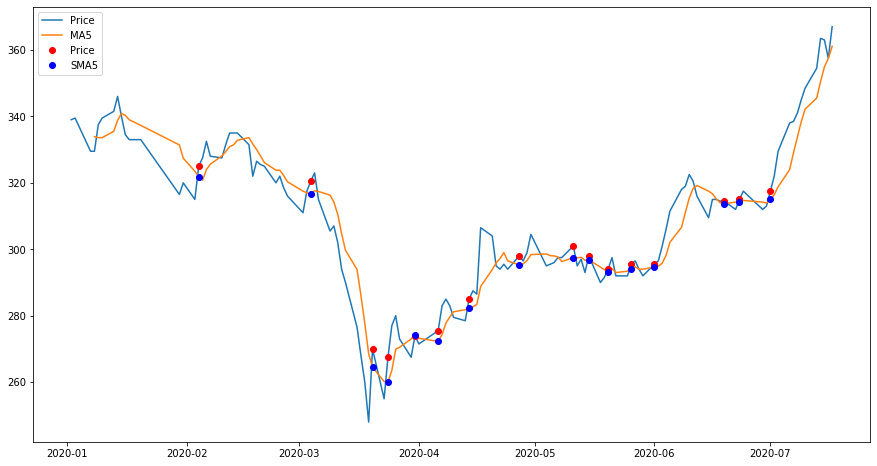

In [355]:
# 繪出股價的日線突破5日線（SMA5)的點

import matplotlib.pyplot as plt
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')

MA5 = abstract.SMA(stock, timeperiod = 5)      # SMA5
# MA20 = abstract.SMA(stock, timeperiod = 20)    # SMA20
# MA60 = abstract.SMA(stock, timeperiod = 60)    # SMA60
Sclose = [dt for dt in stock['close']]
date =  [dt for dt in stock['date']]

Gdate = []
Gprice = []
GMA = []
for i in range(5, len(Sclose)):
    if (Sclose[i-1] <= MA5[i-2]) and (Sclose[i] > MA5[i-1]):
        print(date[i], Sclose[i-1], MA5[i-2], Sclose[i], MA5[i-1])
        
        Gdate.append(date[i])
        Gprice.append(Sclose[i])
        GMA.append(MA5[i])

plt.figure(figsize = (15,8)) # 設定圖形大小
plt.plot(date, price, label = 'Price')
plt.plot(date, MA5, label = 'MA5')
plt.plot(Gdate, Gprice, 'ro', label = 'Price')
plt.plot(Gdate, GMA, 'bo', label = 'SMA5')

plt.legend()
plt.show()


        
# for i in range(1, len(a1)):
#     if (Sopen[i] > Sclose[i-1]):
#         profit.append(Sclose[i] - Sopen[i])
        

# # print('profit:', profit)
# print('sum of profit:', sum(profit))
# print('transation time:', len(profit))
# print('average profit:', sum(profit)/len(profit))

# # 設定輸出的格式
# print("average profit: %.2f" % (sum(profit)/len(profit)))        # 取 2位小數
# print("average profit: ${:>.3f}".format(sum(profit)/len(profit))) # 取 3位小數


In [14]:
# test 
# 改用 pandas.frame
# 繪出股價的日線突破5日線（SMA5)的點

import matplotlib.pyplot as plt
from talib import abstract
import pandas as pd

stock = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume'] 
print(stock2.head())

MA5 = abstract.SMA(stock2, timeperiod = 5)      # SMA5
print(MA5)

stock2['ma5'] = MA5
print(stock2.head())

            open  high   low  close  volume
Date                                       
2011-01-03  71.5  71.6  70.8   71.1   35747
2011-01-04  71.0  71.6  70.8   71.2   36048
2011-01-05  70.9  71.1  69.6   69.8   54327
2011-01-06  69.8  71.0  69.7   71.0   46802
2011-01-07  71.9  73.0  71.9   72.5  170328
Date
2011-01-03       NaN
2011-01-04       NaN
2011-01-05       NaN
2011-01-06       NaN
2011-01-07     71.12
               ...  
2020-07-13    345.50
2020-07-14    350.50
2020-07-15    354.90
2020-07-16    357.40
2020-07-17    361.10
Length: 2343, dtype: float64
            open  high   low  close  volume    ma5
Date                                              
2011-01-03  71.5  71.6  70.8   71.1   35747    NaN
2011-01-04  71.0  71.6  70.8   71.2   36048    NaN
2011-01-05  70.9  71.1  69.6   69.8   54327    NaN
2011-01-06  69.8  71.0  69.7   71.0   46802    NaN
2011-01-07  71.9  73.0  71.9   72.5  170328  71.12


In [77]:
# test ok
# 改用 pandas.frame
# 取得（SMA5)的點的日期及金額

import matplotlib.pyplot as plt
from talib import abstract

stock = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定
stock = stock.loc['2020/01/01':]

stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume'] 

MA5 = abstract.SMA(stock2, timeperiod = 5)      # SMA5

stock2['ma5'] = MA5


Gdate = []

df_empty = pd.DataFrame(columns=['close', 'ma5', 'C', 'D'])
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

for i in range(6, len(stock2)):
    print(stock2.iloc[i-1, 3], stock2.iloc[i-2, 5], stock2.iloc[i, 3], stock2.iloc[i-1, 5])
    if (stock2.iloc[i-1,3] <= stock2.iloc[i-2, 5]) and (stock2.iloc[i, 3] > stock2.iloc[i-1, 5]):
        print('yes:', stock2.index[i], stock2.iloc[i-1, 3], stock2.iloc[i-2, 5], stock2.iloc[i, 3], stock2.iloc[i-1, 5])
        Gdate.append(stock2.index[i])

print(Gdate)

for i in range(0, len(Gdate)):
    print('買點：', Gdate[i], '\t價格：', stock2.loc[Gdate[i], 'close'])

337.5 333.9 339.5 333.6
339.5 333.6 341.5 333.6
341.5 333.6 346.0 335.5
346.0 335.5 340.0 338.8
340.0 338.8 334.5 340.9
334.5 340.9 333.0 340.3
333.0 340.3 333.0 339.0
333.0 339.0 316.5 337.3
316.5 337.3 320.0 331.4
320.0 331.4 315.0 327.4
315.0 327.4 325.0 323.5
yes: 2020-02-04 00:00:00 315.0 327.4 325.0 323.5
325.0 323.5 327.5 321.9
327.5 321.9 332.5 320.8
332.5 320.8 328.0 324.0
328.0 324.0 327.5 325.6
327.5 325.6 331.5 328.1
331.5 328.1 335.0 329.4
335.0 329.4 335.0 330.9
335.0 330.9 335.0 331.4
335.0 331.4 331.5 332.8
331.5 332.8 322.0 333.6
322.0 333.6 326.5 331.7
326.5 331.7 325.5 330.0
325.5 330.0 325.0 328.1
325.0 328.1 320.0 326.1
320.0 326.1 322.0 323.8
322.0 323.8 318.5 323.8
318.5 323.8 316.0 322.2
316.0 322.2 311.0 320.3
311.0 320.3 317.5 317.5
317.5 317.5 320.5 317.0
yes: 2020-03-04 00:00:00 317.5 317.5 320.5 317.0
320.5 317.0 323.0 316.7
323.0 316.7 315.0 317.6
315.0 317.6 305.5 317.4
305.5 317.4 307.0 316.3
307.0 316.3 302.0 314.2
302.0 314.2 294.0 310.5
294.0 310.5 29

In [15]:
# test 
# 改用 pandas.frame
# 繪出股價的日線突破5日線（SMA5)的點

import matplotlib.pyplot as plt
from talib import abstract

stock = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定
stock = stock.loc['2020/01/01':]

stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume'] 

MA5 = abstract.SMA(stock2, timeperiod = 5)      # SMA5
# MA20 = abstract.SMA(stock, timeperiod = 20)    # SMA20
# MA60 = abstract.SMA(stock, timeperiod = 60)    # SMA60
# Sclose = [dt for dt in stock['close']]
# date =  [dt for dt in stock['date']]

stock2['ma5'] = MA5
# Gdate = []
# Gprice = []
# GMA = []
for i in range(5, len(Sclose)):
    if (Sclose[i-1] <= MA5[i-2]) and (Sclose[i] > MA5[i-1]):
        print(date[i], Sclose[i-1], MA5[i-2], Sclose[i], MA5[i-1])
        
        Gdate.append(date[i])
        Gprice.append(Sclose[i])
        GMA.append(MA5[i])

plt.figure(figsize = (15,8)) # 設定圖形大小
plt.plot(date, price, label = 'Price')
plt.plot(date, MA5, label = 'MA5')
plt.plot(Gdate, Gprice, 'ro', label = 'Price')
plt.plot(Gdate, GMA, 'bo', label = 'SMA5')

plt.legend()
plt.show()


        
# for i in range(1, len(a1)):
#     if (Sopen[i] > Sclose[i-1]):
#         profit.append(Sclose[i] - Sopen[i])
        

# # print('profit:', profit)
# print('sum of profit:', sum(profit))
# print('transation time:', len(profit))
# print('average profit:', sum(profit)/len(profit))

# # 設定輸出的格式
# print("average profit: %.2f" % (sum(profit)/len(profit)))        # 取 2位小數
# print("average profit: ${:>.3f}".format(sum(profit)/len(profit))) # 取 3位小數


KeyError: 'close'